In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models
import scipy.io
import numpy as np

In [36]:
def load_mat_data(train_data_path, test_data_path):
    # 加载训练数据
    train_mat = scipy.io.loadmat(train_data_path)
    train_data = np.array(train_mat['train_data_5'], dtype='float32')
    train_labels = np.array(train_mat['train_label_5'], dtype='float32').squeeze()  # 从2D转换为1D
    
    # 加载测试数据
    test_mat = scipy.io.loadmat(test_data_path)
    test_data = np.array(test_mat['test_data_5'], dtype='float32')
    test_labels = np.array(test_mat['test_label_5'], dtype='float32').squeeze()  # 从2D转换为1D
    
    return train_data, train_labels, test_data, test_labels

# 设置数据路径
train_data_path = '/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/database/train_5.mat'
test_data_path = '/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/database/test_5.mat'

# 加载数据
train_data, train_labels, test_data, test_labels = load_mat_data(train_data_path, test_data_path)

# 因为1D CNN需要一个额外的维度，我们将数据重塑
train_data = train_data.reshape((-1, 3072, 1))
test_data = test_data.reshape((-1, 3072, 1))

# 对数据进行归一化处理
train_data /= np.max(train_data)
test_data /= np.max(test_data)


[0. 0. 0. ... 9. 9. 9.]


In [27]:
print(train_data.min(), train_data.max())

-1.0812584 1.0


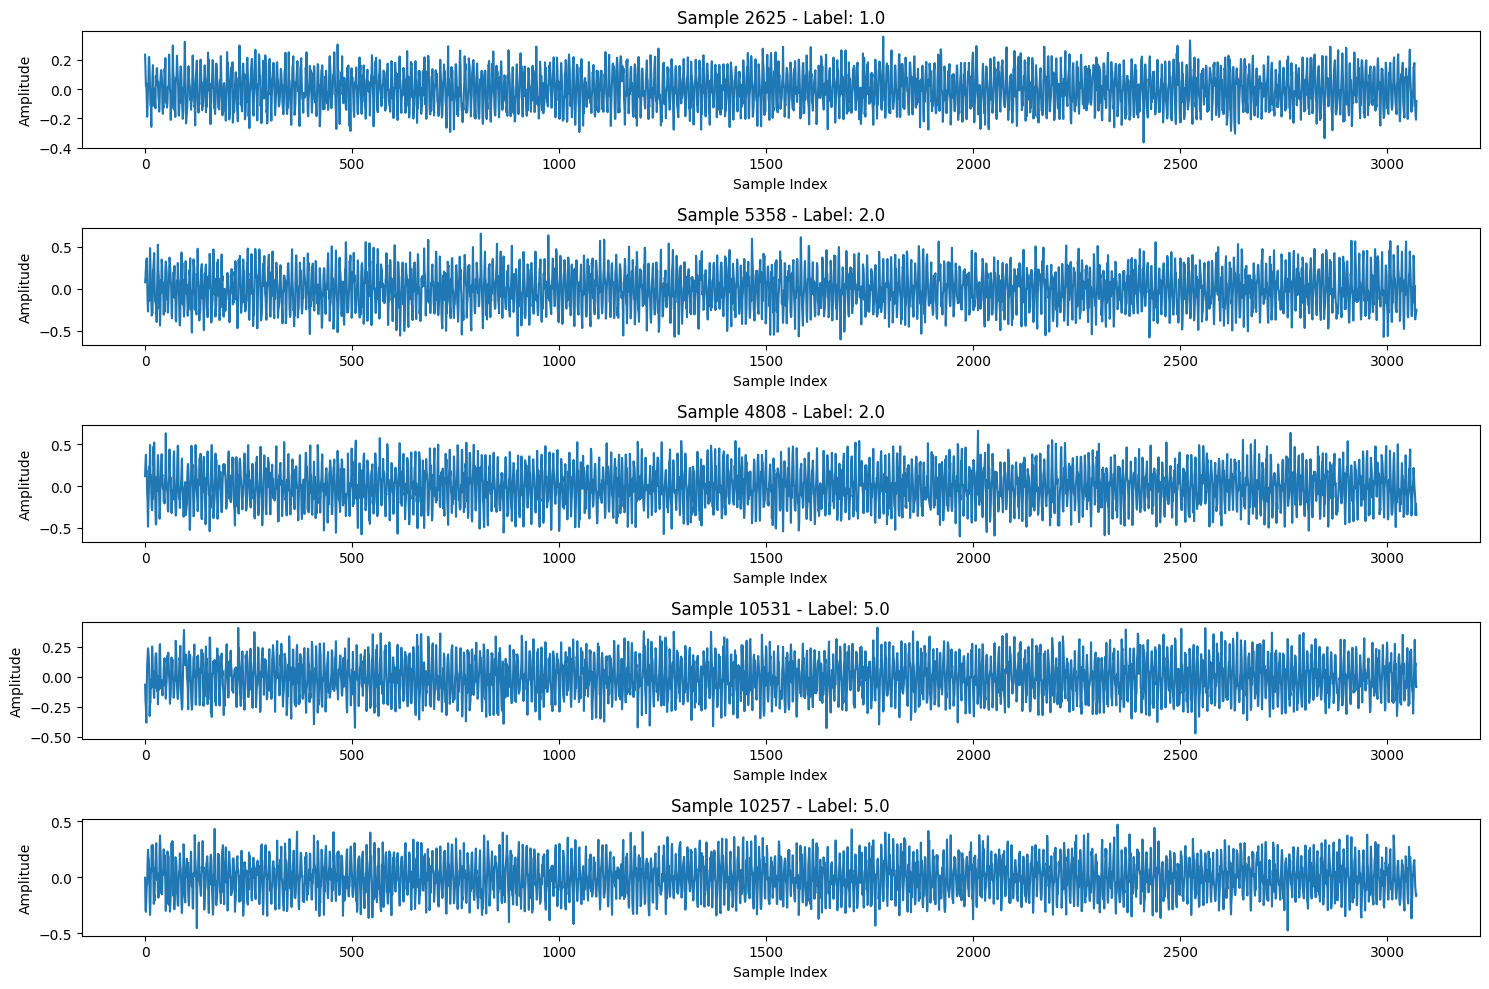

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# 假设train_data已经按照上一步骤加载和预处理

# 随机选择几个样本进行可视化
samples_to_display = 5
indices = np.random.choice(range(train_data.shape[0]), samples_to_display, replace=False)

plt.figure(figsize=(15, 10))
for i, index in enumerate(indices, start=1):
    plt.subplot(samples_to_display, 1, i)
    plt.plot(train_data[index].squeeze())  # 使用squeeze()去掉单一维度
    plt.title(f'Sample {index} - Label: {train_labels[index]}')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# 构建1D CNN模型
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(3072, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='softmax')  # 假设你有10个类别
])

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 3070, 64)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 1535, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 1533, 128)      │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 766, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 98048)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │    12,550,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,576,522 (47.98 MB)

 Trainable params: 12,576,522 (47.98 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [31]:
print('Unique train labels:', np.unique(train_labels))
print('Unique test labels:', np.unique(test_labels))


Unique train labels: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Unique test labels: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [32]:
history = model.fit(train_data, train_labels, epochs=10, validation_split=0.2)


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 36s 79ms/step - accuracy: 0.6132 - loss: 0.9885 - val_accuracy: 0.0000e+00 - val_loss: 103.0946
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 32s 71ms/step - accuracy: 0.9205 - loss: 0.1938 - val_accuracy: 0.0000e+00 - val_loss: 123.6402
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 32s 71ms/step - accuracy: 0.9438 - loss: 0.1367 - val_accuracy: 0.0000e+00 - val_loss: 125.9680
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.9688 - loss: 0.0846 - val_accuracy: 0.0000e+00 - val_loss: 143.5078
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 32s 70ms/step - accuracy: 0.9768 - loss: 0.0653 - val_accuracy: 0.0000e+00 - val_loss: 120.5321
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 35s 78ms/step - accuracy: 0.9692 - loss: 0.0895 - val_accuracy: 0.0000e+00 - val_loss: 153.9769
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.9782 - loss: 0.0550 - val_accuracy: 0.0000e+00 - val_loss: 158.9978
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 32s 71ms

In [37]:
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


63/63 - 1s - 22ms/step - accuracy: 0.4270 - loss: 43.5294

Test accuracy: 0.4269999861717224


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       1.00      1.00      1.00       200
           2       0.10      0.10      0.10       200
           3       0.26      1.00      0.41       200
           4       1.00      1.00      1.00       200
           5       0.34      1.00      0.51       200
           6       0.00      0.00      0.00       200
           7       1.00      0.17      0.30       200
           8       0.00      0.00      0.00       200
           9       0.00      0.00      0.00       200

    accuracy                           0.43      2000
   macro avg       0.37      0.43      0.33      2000
weighted avg       0.37      0.43      0.33      2000



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

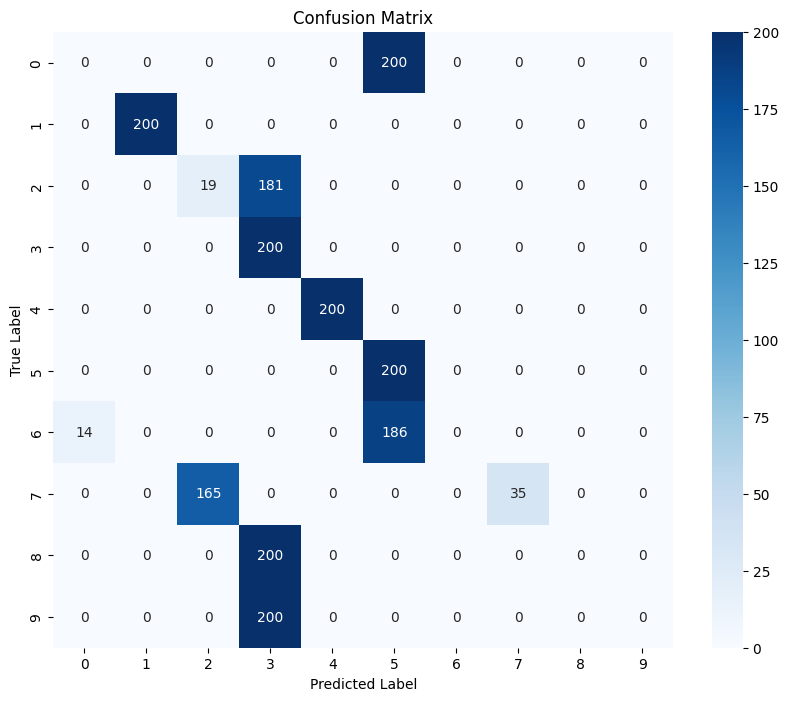

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 预测测试数据集
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels, predicted_classes, target_names=[str(i) for i in range(10)])  # 假设有10个类别
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


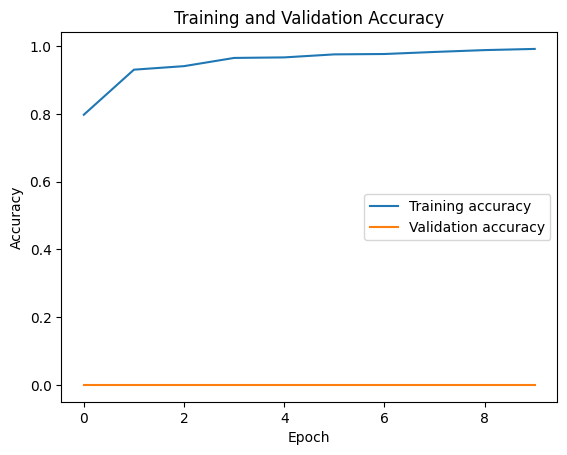

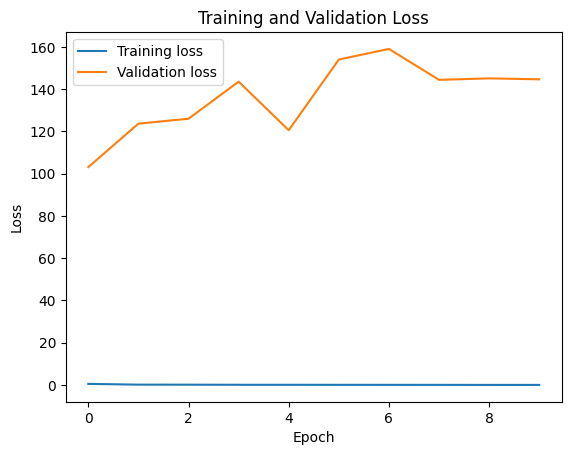

In [38]:
# 可视化训练过程
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()